#  Home Credit Default Risk コンペティション

### 【問題1】コンペティション内容の把握

以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

このコンペティションでは何を予測する？目的変数は？
企業がこのコンペティションを開催することで得られるメリットは？
データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

###### 各応募者がローンを返済する能力がどれほど高いかを予測する。
###### 目的変数：application_train.csv/Target(TRUE:できる, FALSE:できない)
##### メリット：人間の肌感覚から判断するのではなく、数値化できるようにすることによって、新たな領域への拡大も視野に入れられる。

###### 副次的なもの：採用、広告
#### 予測結果に影響してきそうなこと：年収、家族構成、過去の貸し倒れ、役職、SNSのフォロワー数、住所、賃貸かどうか、結婚歴、学歴

### 【問題2】データの概観

データの概観を把握してください。

（例）.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスごとのデータ数をグラフに出す
コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

In [1]:
# import necessary modul
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

from quilt.data.ResidentMario import missingno_data
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
df_submission = pd.read_csv('sample_submission.csv')

In [3]:
df_submission

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
5,100042,0.5
6,100057,0.5
7,100065,0.5
8,100066,0.5
9,100067,0.5


In [4]:
df_train = pd.read_csv('application_train.csv')

In [5]:
#カラム内の文字数。デフォルトは50だった
pd.set_option("display.max_colwidth", 100)

#行数
pd.set_option("display.max_rows", 1500)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


1) .head()、.info()、describe()などを使う

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


2)欠損値の有無を見る

In [8]:
df_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
sorted(df_train, reverse=True)

['YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'WEEKDAY_APPR_PROCESS_START',
 'WALLSMATERIAL_MODE',
 'TOTALAREA_MODE',
 'TARGET',
 'SK_ID_CURR',
 'REG_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG'

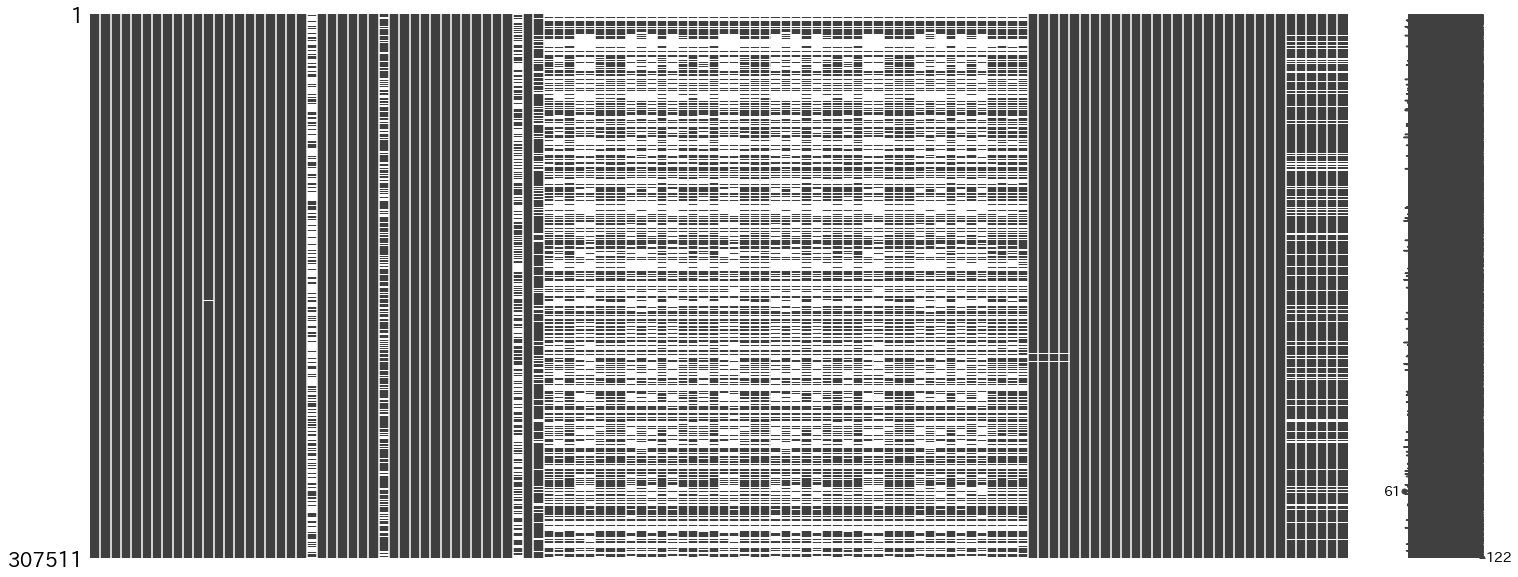

In [10]:
msno.matrix(df_train)

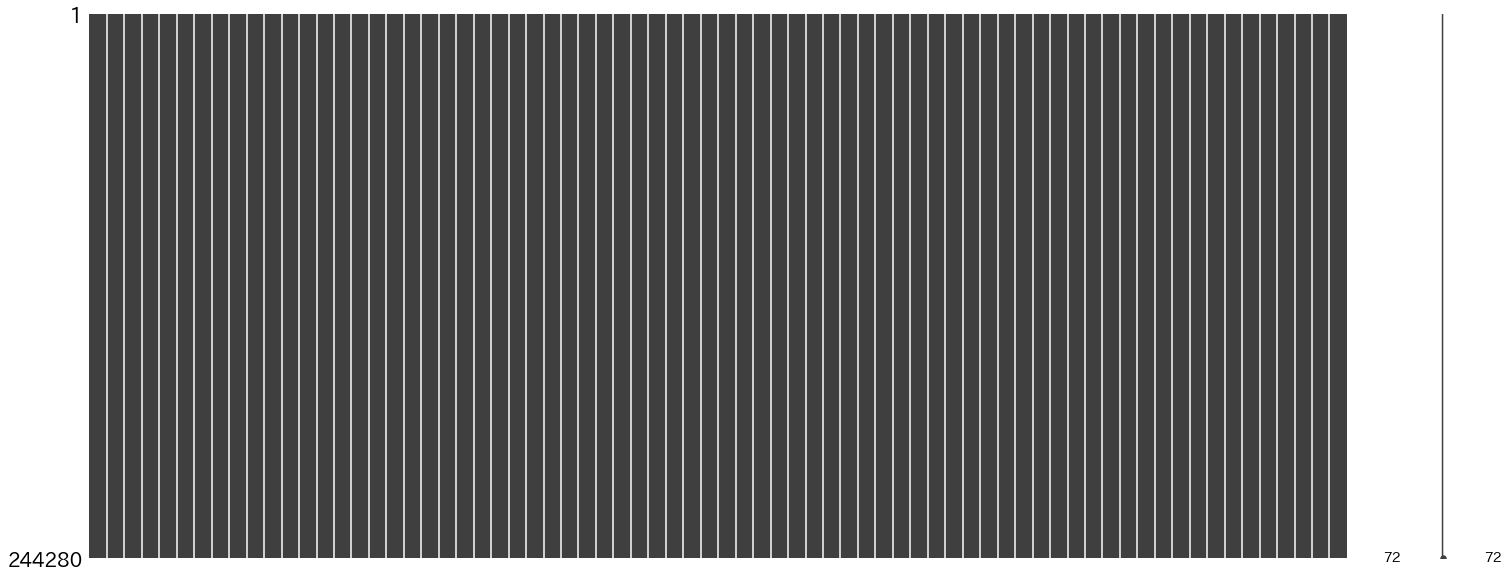

In [11]:
df_train_analysis = df_train.dropna(thresh=len(df_train)*0.8, axis=1)
df_train_analysis = df_train_analysis.dropna(axis=0)

len(df_train_analysis)
msno.matrix(df_train_analysis)

In [12]:
df_train_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244280 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     244280 non-null int64
TARGET                         244280 non-null int64
NAME_CONTRACT_TYPE             244280 non-null object
CODE_GENDER                    244280 non-null object
FLAG_OWN_CAR                   244280 non-null object
FLAG_OWN_REALTY                244280 non-null object
CNT_CHILDREN                   244280 non-null int64
AMT_INCOME_TOTAL               244280 non-null float64
AMT_CREDIT                     244280 non-null float64
AMT_ANNUITY                    244280 non-null float64
AMT_GOODS_PRICE                244280 non-null float64
NAME_TYPE_SUITE                244280 non-null object
NAME_INCOME_TYPE               244280 non-null object
NAME_EDUCATION_TYPE            244280 non-null object
NAME_FAMILY_STATUS             244280 non-null object
NAME_HOUSING_TYPE              244280 non-null object
REGION_POPULATION_RELATI

In [13]:
df_train_analysis.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [14]:
sorted(df_train_analysis.columns)

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',

3) クラスごとのデータ数をグラフに出す

307511名にお金を貸した場合、
貸しても、お金を返してくれない人は、24825名
貸したら、お金を返してくれる人は、282686名


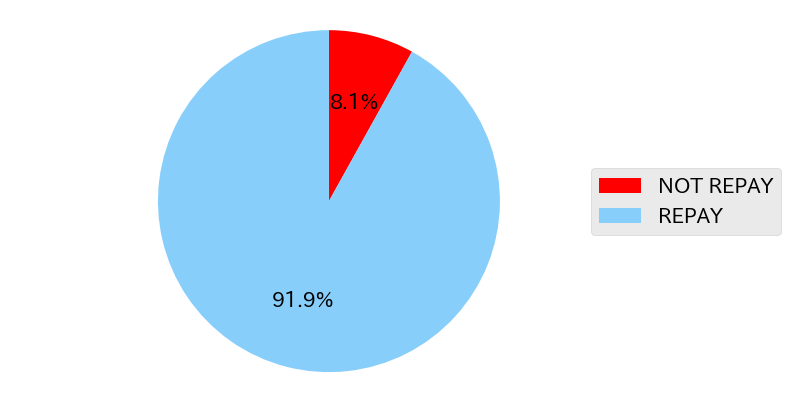

In [15]:
TARGET_TRUE = df_train["TARGET"].sum() 
TARGET_FALSE = df_train["TARGET"].count() - df_train["TARGET"].sum() 

list_TARGET = [TARGET_TRUE, TARGET_FALSE]

print("{}名にお金を貸した場合、".format(TARGET_TRUE+TARGET_FALSE))
print("貸しても、お金を返してくれない人は、{}名".format(TARGET_TRUE))
print("貸したら、お金を返してくれる人は、{}名".format(TARGET_FALSE))


# draw the pie
label = ['NOT REPAY', 'REPAY']
colors = ['red', 'lightskyblue']
size = [15, 30, 45]
explode = (0, 0.1, 0)

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

size=(9,5)

plt.figure(figsize=size,dpi=100)
plt.pie(list_TARGET,colors=colors,counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('figure.png',bbox_inches='tight',pad_inches=0.05)

4) 結果に対する説明や考察

貸し倒れの確率は全体訓練データ数8602名に対して、6.1％の526名である。
これは、人数ベースでの割合であるので、金額ベースにしたとき、どのような結果になるか確認する必要がある。

cf) 下処理続き：数値化

In [16]:
df_train_object = df_train_analysis.select_dtypes(include=object).columns

for col in df_train_object:
    print(df_train_analysis[col].value_counts())

Cash loans         222308
Revolving loans     21972
Name: NAME_CONTRACT_TYPE, dtype: int64
F      162361
M       81915
XNA         4
Name: CODE_GENDER, dtype: int64
N    158789
Y     85491
Name: FLAG_OWN_CAR, dtype: int64
Y    168943
N     75337
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      199218
Family              31633
Spouse, partner      8735
Children             2536
Other_B              1316
Other_A               636
Group of people       206
Name: NAME_TYPE_SUITE, dtype: int64
Working                 125885
Commercial associate     56151
Pensioner                43914
State servant            18311
Student                     13
Businessman                  4
Unemployed                   2
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    172102
Higher education                  61387
Incomplete higher                  7820
Lower secondary                    2835
Academic degree                     136
Name: NAME_EDUCATION_TYPE, dtype: int64
Marrie

In [17]:
for column in df_train_object:
    df_train_analysis[column], _ = pd.factorize(df_train_analysis[column])
    df_train_analysis[column] = df_train_analysis[column].astype('int')

In [18]:
df_train_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244280 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     244280 non-null int64
TARGET                         244280 non-null int64
NAME_CONTRACT_TYPE             244280 non-null int32
CODE_GENDER                    244280 non-null int32
FLAG_OWN_CAR                   244280 non-null int32
FLAG_OWN_REALTY                244280 non-null int32
CNT_CHILDREN                   244280 non-null int64
AMT_INCOME_TOTAL               244280 non-null float64
AMT_CREDIT                     244280 non-null float64
AMT_ANNUITY                    244280 non-null float64
AMT_GOODS_PRICE                244280 non-null float64
NAME_TYPE_SUITE                244280 non-null int32
NAME_INCOME_TYPE               244280 non-null int32
NAME_EDUCATION_TYPE            244280 non-null int32
NAME_FAMILY_STATUS             244280 non-null int32
NAME_HOUSING_TYPE              244280 non-null int32
REGION_POPULATION_RELATIVE     24

In [19]:
df_train_sample = df_train_analysis[0:1000]

### 【問題3】課題設定

データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

【課題・疑問】

・標準化を行う前の散布図と行った後の散布図

・最も影響の大きい要因を知る

・欠損値がどこで起こるのか

・返してくれないとどれくらいのリスクなのか、投資効率を知りたい

・特徴量をターゲットに対する相関が高い順に並べる

・特徴量同士の相互相関関係を見る

・重回帰分析で、図式化する

・カテゴリ型をイント型に変換し、表を再出力する

・

### 【問題4】データ探索

問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

In [20]:
df_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1270
Data columns (total 72 columns):
SK_ID_CURR                     1000 non-null int64
TARGET                         1000 non-null int64
NAME_CONTRACT_TYPE             1000 non-null int32
CODE_GENDER                    1000 non-null int32
FLAG_OWN_CAR                   1000 non-null int32
FLAG_OWN_REALTY                1000 non-null int32
CNT_CHILDREN                   1000 non-null int64
AMT_INCOME_TOTAL               1000 non-null float64
AMT_CREDIT                     1000 non-null float64
AMT_ANNUITY                    1000 non-null float64
AMT_GOODS_PRICE                1000 non-null float64
NAME_TYPE_SUITE                1000 non-null int32
NAME_INCOME_TYPE               1000 non-null int32
NAME_EDUCATION_TYPE            1000 non-null int32
NAME_FAMILY_STATUS             1000 non-null int32
NAME_HOUSING_TYPE              1000 non-null int32
REGION_POPULATION_RELATIVE     1000 non-null float64
DAYS_BIRTH      

In [21]:
top_amount_six = df_train_sample.describe().T.sort_values(['mean'], ascending=False).head(6).index

In [22]:
# 1枚目
df_train_six = df_train_sample[top_amount_six]
df_train_six

,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,SK_ID_CURR,DAYS_EMPLOYED,AMT_ANNUITY
0,406597.5,351000.0,202500.000,100002,-637,24700.5
2,135000.0,135000.0,67500.000,100004,-225,6750.0
5,490495.5,454500.0,99000.000,100008,-1588,27517.5
6,1560726.0,1395000.0,171000.000,100009,-3130,41301.0
7,1530000.0,1530000.0,360000.000,100010,-449,42075.0
8,1019610.0,913500.0,112500.000,100011,365243,33826.5
10,652500.0,652500.0,112500.000,100014,-679,21177.0
11,148365.0,135000.0,38419.155,100015,365243,10678.5
12,80865.0,67500.0,67500.000,100016,-2717,5881.5
13,918468.0,697500.0,225000.000,100017,-3028,28966.5


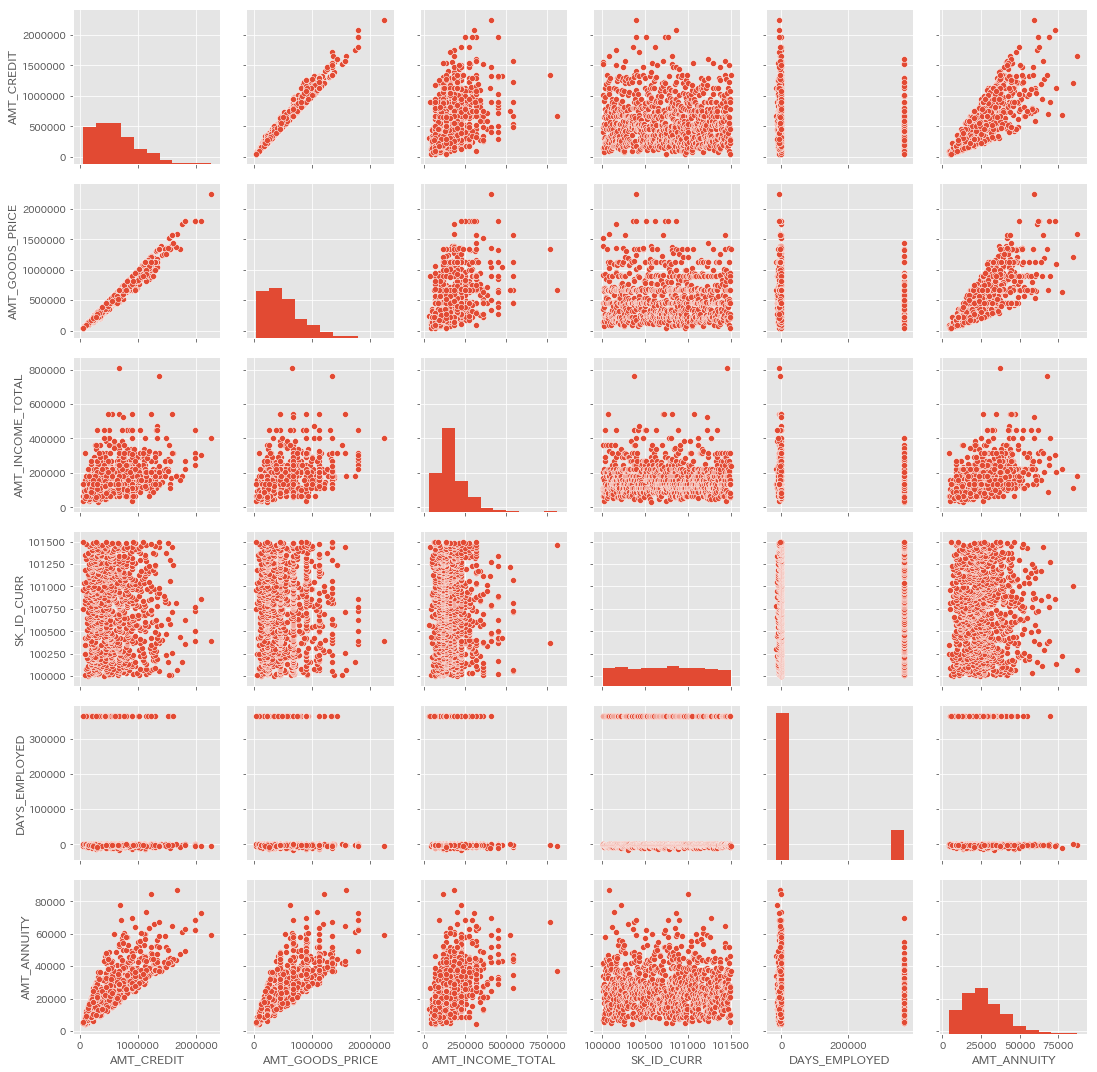

In [48]:
# 2枚目
# 標準化前

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

sns.pairplot(df_train_six)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_train_six)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
scaler.mean_

array([602700.156   , 541299.069   , 167987.180655, 100740.964   ,
        59040.776   ,  26844.5925  ])

In [41]:
scaler_df_six = pd.DataFrame(scaler.transform(df_train_six))

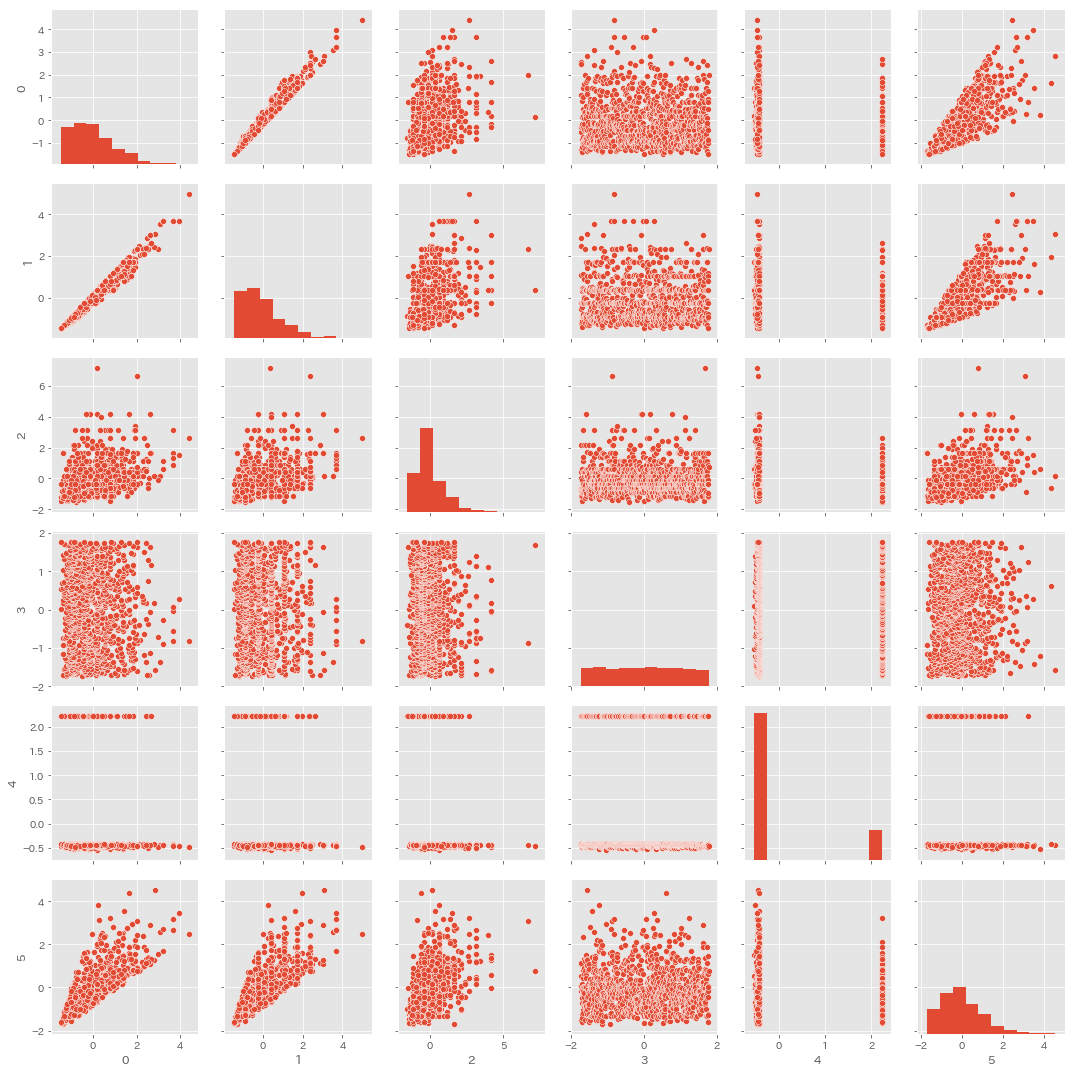

In [45]:
# 3枚目
# 標準化後
sns.pairplot(scaler_df_six)

In [51]:
# 4枚目
# TARGETとの相関系をみる　特徴量をターゲットに対する相関が高い順に並べる　特徴量同士の相互相関関係を見る
df_crr = df_train_sample.copy().corr()

# Genarate sorted dataframe
df_crr_sort = df_crr.sort_values('TARGET', ascending=False)
df_crr_sort

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,0.025296,1.000000,-0.027005,-0.083085,-0.035638,0.018895,0.008931,-0.000819,-0.012637,0.030377,...,0.030450,NaN,NaN,-0.008546,0.052698,0.015344,-0.010046,0.038241,-0.028515,-0.034114
DAYS_BIRTH,0.041732,0.114013,0.081319,-0.165876,0.122367,0.126350,0.343471,0.050251,-0.065973,-0.000988,...,0.031868,NaN,NaN,0.059129,-0.001900,-0.020692,-0.013201,0.035452,-0.017822,-0.099590
DAYS_ID_PUBLISH,0.019946,0.097366,0.069515,-0.052559,-0.045722,0.015698,-0.005857,0.048748,-0.004544,0.007494,...,0.000078,NaN,NaN,0.049268,0.026592,0.049941,0.015871,-0.019211,-0.013128,-0.019151
DAYS_LAST_PHONE_CHANGE,-0.033790,0.094029,0.063000,-0.041095,-0.037200,0.050097,0.040958,-0.005213,-0.026588,-0.039928,...,0.045331,NaN,NaN,0.009936,-0.007653,0.018167,-0.025019,-0.061695,0.009034,-0.120831
REG_REGION_NOT_LIVE_REGION,0.017066,0.067810,0.026270,-0.088930,0.021212,0.033552,0.010890,0.096687,0.037190,0.035473,...,0.076625,NaN,NaN,-0.004745,-0.015074,-0.010164,-0.027198,0.040336,-0.028157,-0.063132
REG_CITY_NOT_WORK_CITY,0.024680,0.064215,-0.014340,-0.182422,0.129009,-0.017540,0.063659,0.059040,-0.018563,0.028385,...,-0.014952,NaN,NaN,0.054800,-0.058026,0.058688,0.042445,-0.011580,-0.017742,-0.008891
ORGANIZATION_TYPE,0.045730,0.062343,-0.021940,0.011947,0.022504,-0.045054,0.114111,0.087283,0.043184,0.083093,...,0.056925,NaN,NaN,-0.025573,0.038099,-0.004485,-0.019216,0.019861,-0.025380,-0.036041
REGION_RATING_CLIENT,0.010250,0.062209,-0.039117,0.050233,-0.026498,0.052318,0.015794,-0.235272,-0.086887,-0.144290,...,-0.061371,NaN,NaN,-0.003260,0.010355,0.010473,-0.008585,-0.069743,0.056358,-0.040982
REG_REGION_NOT_WORK_REGION,-0.011436,0.061974,0.007607,-0.147436,0.087501,0.010634,-0.007219,0.131774,0.025861,0.048084,...,-0.018196,NaN,NaN,-0.007410,-0.023539,-0.015872,-0.020397,-0.030939,0.008249,-0.067707
REGION_RATING_CLIENT_W_CITY,0.019818,0.060252,-0.039159,0.044668,-0.017208,0.032059,0.020881,-0.245058,-0.098410,-0.146943,...,-0.058554,NaN,NaN,-0.001725,0.015599,0.014071,-0.009889,-0.061101,0.042203,-0.043610


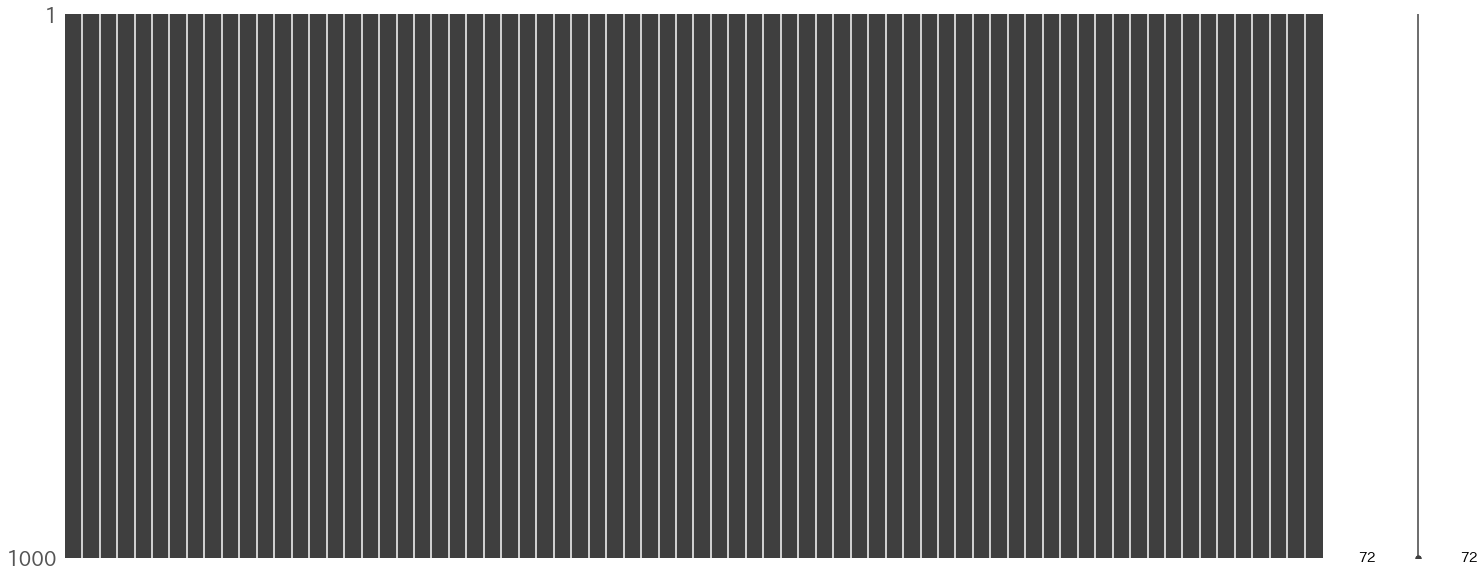

In [53]:
# 5枚目
# 欠損値どこで起こるか
len(df_train_analysis)
msno.matrix(df_train_sample)

In [24]:
# 6枚目
# 決定木による出力 最も影響の大きい要因を知る
X = df_train_sample.drop(columns = "TARGET")
y = df_train_sample["TARGET"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1270
Data columns (total 71 columns):
SK_ID_CURR                     1000 non-null int64
NAME_CONTRACT_TYPE             1000 non-null int32
CODE_GENDER                    1000 non-null int32
FLAG_OWN_CAR                   1000 non-null int32
FLAG_OWN_REALTY                1000 non-null int32
CNT_CHILDREN                   1000 non-null int64
AMT_INCOME_TOTAL               1000 non-null float64
AMT_CREDIT                     1000 non-null float64
AMT_ANNUITY                    1000 non-null float64
AMT_GOODS_PRICE                1000 non-null float64
NAME_TYPE_SUITE                1000 non-null int32
NAME_INCOME_TYPE               1000 non-null int32
NAME_EDUCATION_TYPE            1000 non-null int32
NAME_FAMILY_STATUS             1000 non-null int32
NAME_HOUSING_TYPE              1000 non-null int32
REGION_POPULATION_RELATIVE     1000 non-null float64
DAYS_BIRTH                     1000 non-null int64
DAYS_EMPLOYED   

In [25]:
# !pip install pydotplus

In [26]:
# !pip install graphviz

In [27]:
#可視化
from sklearn import tree

In [28]:
# graph = graphviz.Source(dot_data) 
# graph.render("sample") 

In [29]:
clf = tree.DecisionTreeClassifier()

In [30]:
clf = clf.fit(X, y)

In [31]:
import graphviz 

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None) 

In [33]:
graph = graphviz.Source(dot_data)

In [34]:
graph.render("sample") 

'sample.pdf'

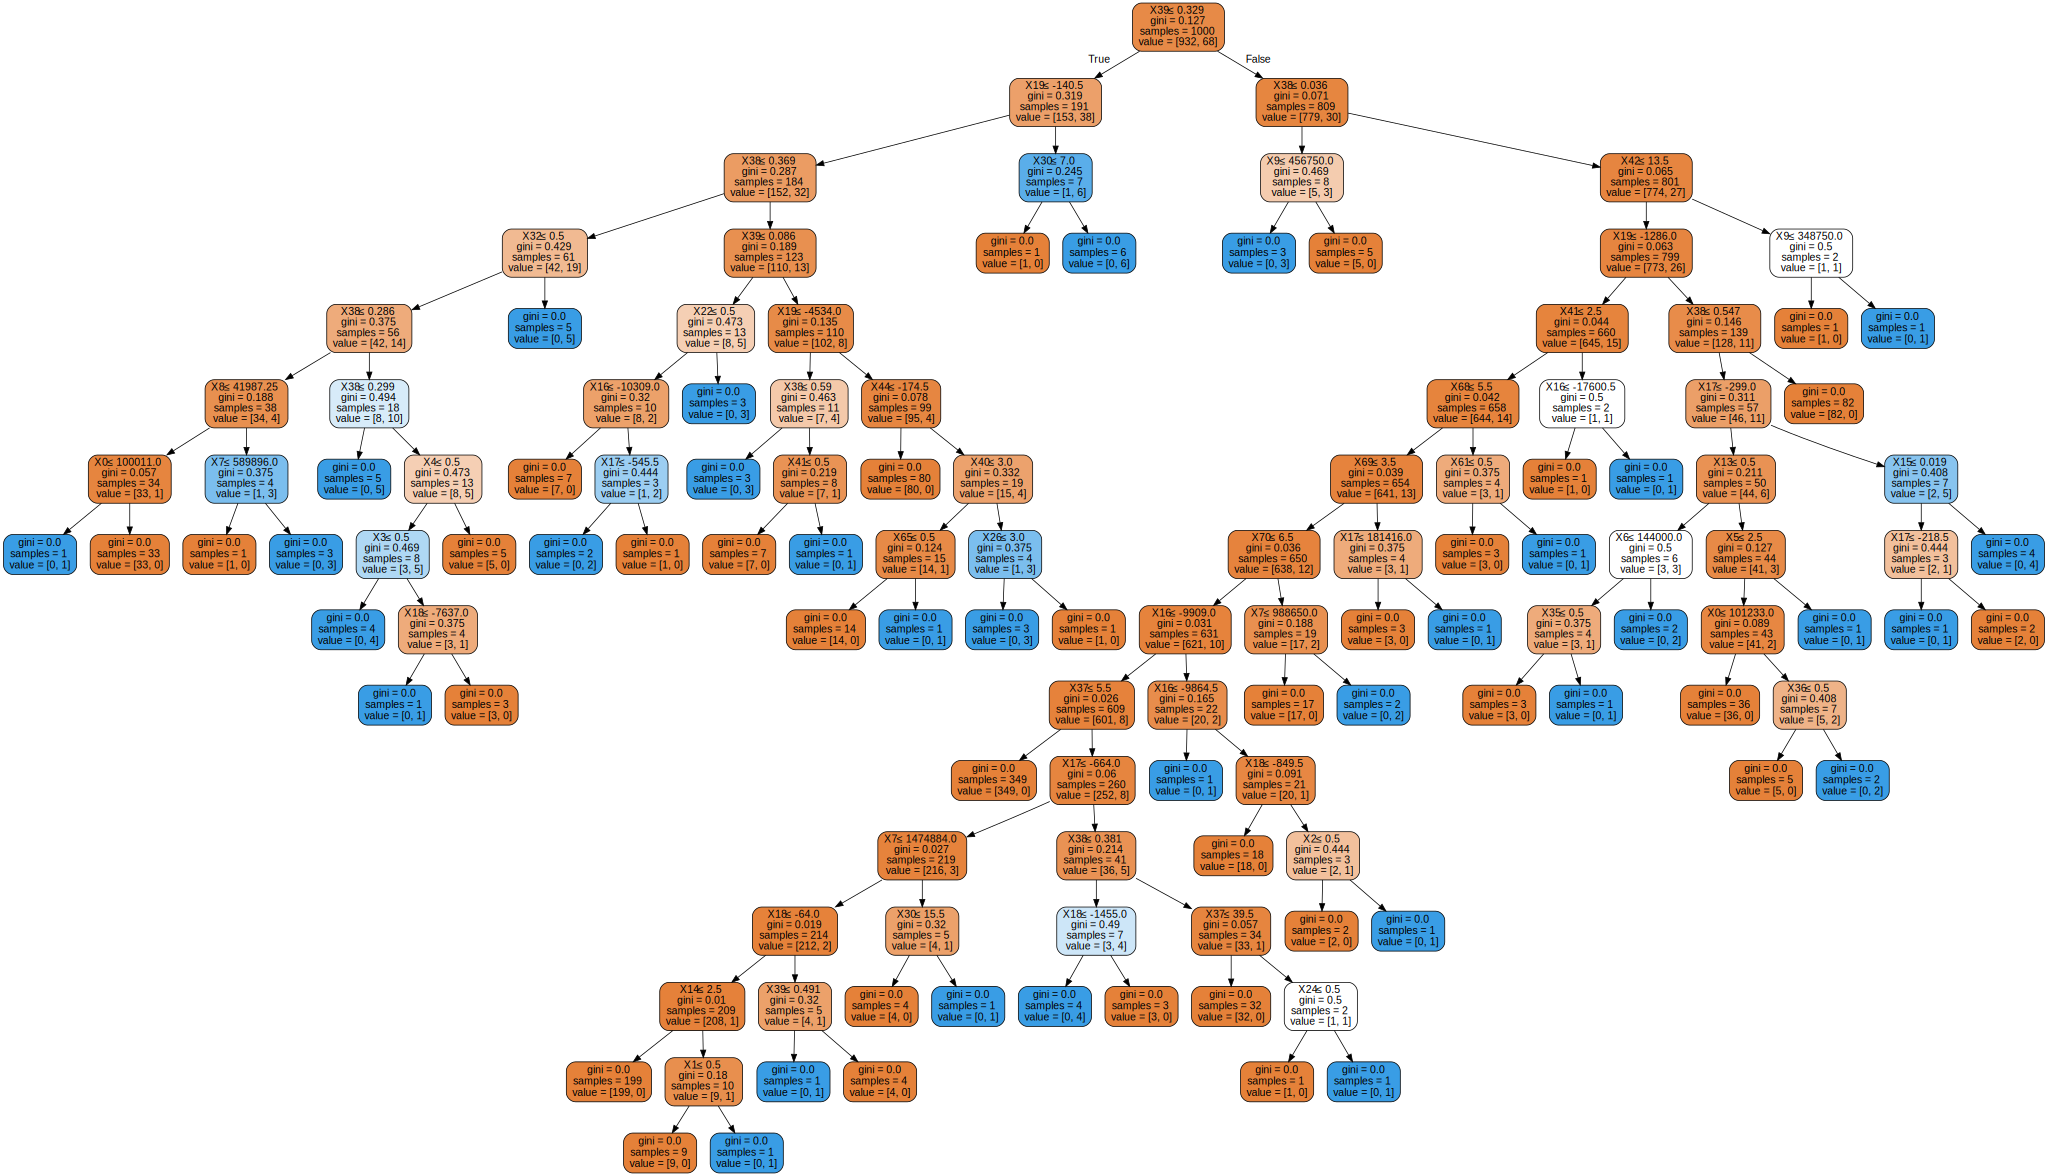

In [35]:
dot_data = tree.export_graphviz(clf, out_file=None,   
                     filled=True, rounded=True,  
                     special_characters=True)   # feature_names=iris.feature_names, class_names=iris.target_names, 
graph = graphviz.Source(dot_data)  
graph 

In [61]:
important = df_train_sample.columns[39]
print("最も重要な要因は{}です".format(important))

最も重要な要因はEXT_SOURCE_2です


### 【問題5】（アドバンス課題）カーネルへの投稿

Kaggleのカーネルに今回行ったEDAを投稿してみましょう。英語の文章を書くことが難しい場合は、機械翻訳サービスを活用するなどでも構いません。